# Featurization, Model Selection and Tuning

## Data Description :  

The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

## Context :  

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

#### 1. Deliverable -1 (Exploratory data quality report reflecting the following) 

a. Univariate analysis
 i. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers
b. Multivariate analysis
 i. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes
c. Strategies to address the different data challenges such as data pollution, outliers and missing values


#### 2. Deliverable -2 (Feature Engineering techniques) 

a. Identify opportunities (if any) to create a composite feature, drop a feature
b. Decide on complexity of the model, should it be simple linear mode in terms of parameters or would a quadratic or higher degree help
c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

#### 3. Deliverable -3 (create the model )

a. Obtain feature importance for the individual features using multiple methods and present your findings

#### 4. Deliverable -4 (Tuning the model) 

a. Algorithms that you think will be suitable for this project
b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit
c. Model performance range at 95% confidence level

## Importing the Libraries and loading the Dataset :¶ 

In [1]:
#Import the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Getting the Data from the .csv file
db=pd.read_csv('concrete.csv')

In [3]:
#Checking first 10 rows
db.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [4]:
#Checking last 10 rows
db.tail(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1020,183.9,122.6,0.0,203.5,0.0,959.2,800.0,7,10.79
1021,203.5,305.3,0.0,203.5,0.0,963.4,630.0,3,9.56
1022,144.8,0.0,133.6,180.8,11.1,979.5,811.5,28,13.20
1023,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7,10.39
1024,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3,21.91
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


Some of the values under columns 'ash', 'superplastic' and 'slag' contains 0 values. Not sure about the reason behind it. Maybe for cement creation sometimes these ingrediants are avoided. Hence the values are represented as 0.0. 
In another perspective, it may be missing values, which is represented as 0.0. So lets explore more

## Understanding the structure of dataset :¶

In [5]:
# understand shape and size of dataset
print(db.shape)
print (db.size) # it contains 1030 rows and 9 columns. Total of 9270 values.

(1030, 9)
9270


In [6]:
#get more information about dataset
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Hence we can clearly see that all the columns are either float or integer types. No categorical variables exists. Hence we are good to go with this dataset. Now exploring the trends.

In [7]:
#Details of the Dataset
db.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Check the range of values for each column in the dataset. 'Slag', 'superplastic' and 'ash' columns have even 25% range as 0.

In [8]:
#Checking the null values, and if there is null value present then replace those with the median values :
val=db.isnull().values.any()

if val==True:
    print("Missing/NaN values present", db.isnull().values.sum())
else:
    print("No missing/NaN values")

No missing/NaN values


There is no missing values present in the dataset (as we had a glimpse in the head and tail views). Now lets go ahead and plot the required graphs, more exploring the data in more details.

## Plot various graphs to explore the dataset :

Plotting the histogram and box plot for each columns to go through the potential outliers, mean and other details.

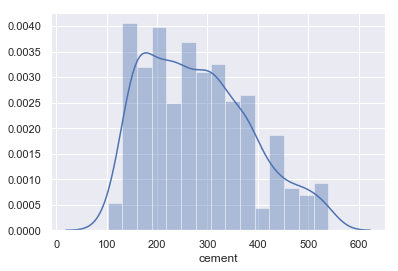

In [9]:
sns.distplot(db["cement"])

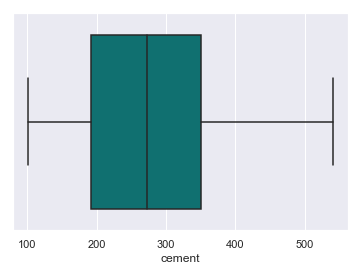

In [10]:
sns.boxplot(db['cement'], color='teal')

Does not contain any outliers. A bit right skewed, but mostly normalized curve.

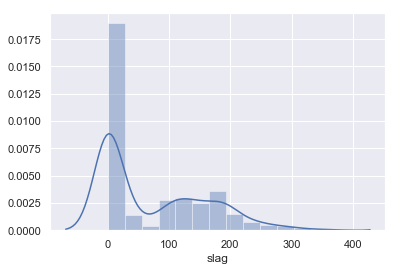

In [11]:
sns.distplot(db["slag"])

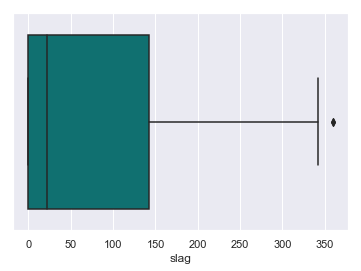

In [12]:
sns.boxplot(db['slag'], color='teal')

Interestingly contains a lot of 0.0 values in the columns. Highly right skewed. Contains some outliers in the higher side of the data. As a remedy we can replace the outlier values with the (75 percentile) limiting values. But remember by doing so, we will again intorduce some new outliers (which were earlier withinh the acceptable range). But here considering the significance of the 'slag' usage, we are keeping the outliers.

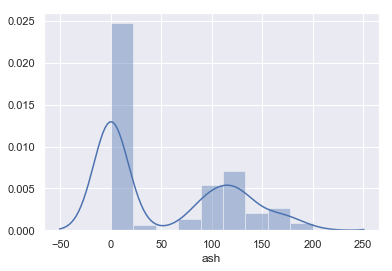

In [13]:
sns.distplot(db["ash"])

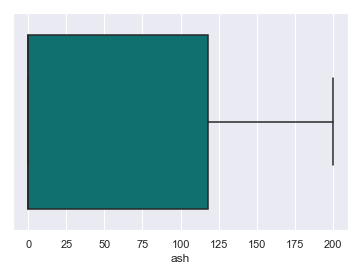

In [14]:
sns.boxplot(db['ash'], color='teal')

Similar as 'slag' contains a lot of 0.0 values. Clearly contains 2 gaussians (clusters). Does not contain any outliers though.

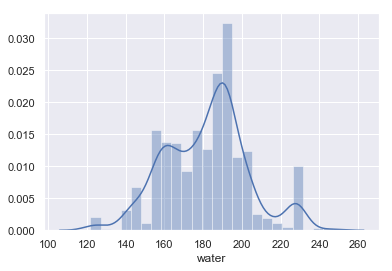

In [15]:
sns.distplot(db["water"])

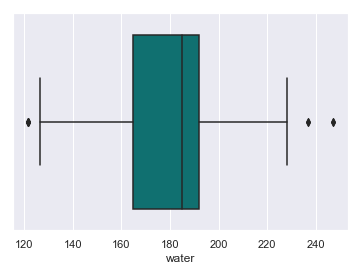

In [16]:
sns.boxplot(db['water'], color='teal')

3 clusters can be clearly seen being present in this dataset. Outliers present in both maximum and minimum range. We can easily neglect the outliers, but considering it to contain significance, we are keeping the values.

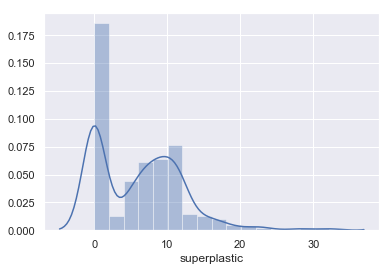

In [17]:
sns.distplot(db["superplastic"])

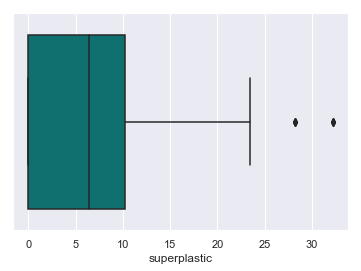

In [18]:
sns.boxplot(db['superplastic'], color='teal')

Two clusters are present in this dataset. Some outliers are present in the higher range. Most of the values in this column is 0.0.

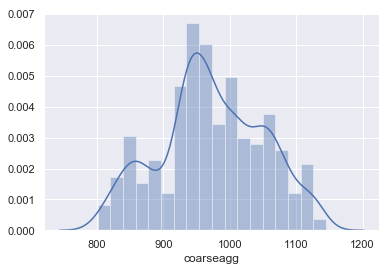

In [19]:
sns.distplot(db["coarseagg"])

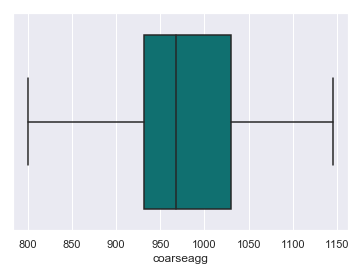

In [20]:
sns.boxplot(db['coarseagg'], color='teal')

A nearly normalised data, contains 3 clusters. This column does not contain any outliers.

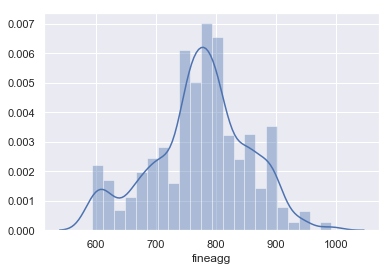

In [21]:
sns.distplot(db["fineagg"])

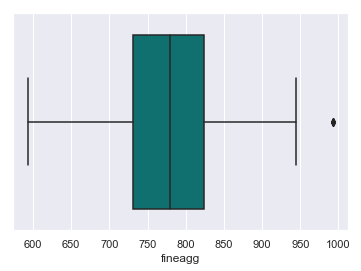

In [22]:
sns.boxplot(db['fineagg'], color='teal')

Contains certain clusters. Contains outliers on the higher side of the values. A more or less normalised curve. Clearly no missing or 0.0 values.

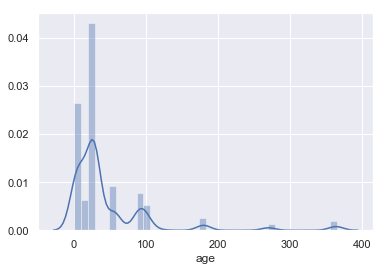

In [23]:
sns.distplot(db["age"])

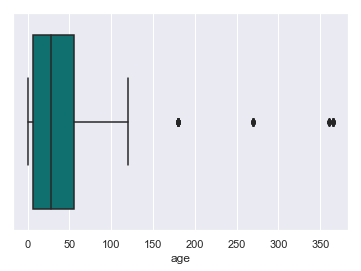

In [24]:
sns.boxplot(db['age'], color='teal')

This datase contains a wide range of contrasting values. There are 0 present in this columns as well as massive age values. May be this is because the strength is tested for a wide variety of cement. Hence keeping the age column as it is.

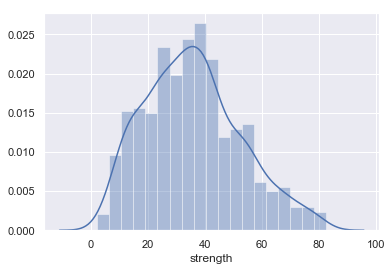

In [25]:
sns.distplot(db["strength"])

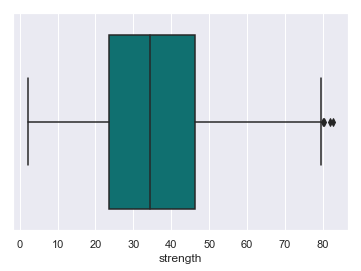

In [26]:
sns.boxplot(db['strength'], color='teal')

This is the Target column of the dataset. The data is nearly normalised, but contain some outlier on the higher end. Maybe 3 clusters present in this dataset. (Right skewed as per the bos plot)

In [27]:
# Checking the distribution between 'strength' column (Target Variable)
db.groupby(["strength"]).count()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
strength,,,,,,,,
2.33,1,1,1,1,1,1,1,1
3.32,1,1,1,1,1,1,1,1
4.57,1,1,1,1,1,1,1,1
4.78,1,1,1,1,1,1,1,1
4.83,1,1,1,1,1,1,1,1
4.90,1,1,1,1,1,1,1,1
6.27,1,1,1,1,1,1,1,1
6.28,1,1,1,1,1,1,1,1
6.47,1,1,1,1,1,1,1,1


Since the target variable ('Strenth') is a continuous variable. We are getting new values here.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CD6A550>,
      dtype=object)

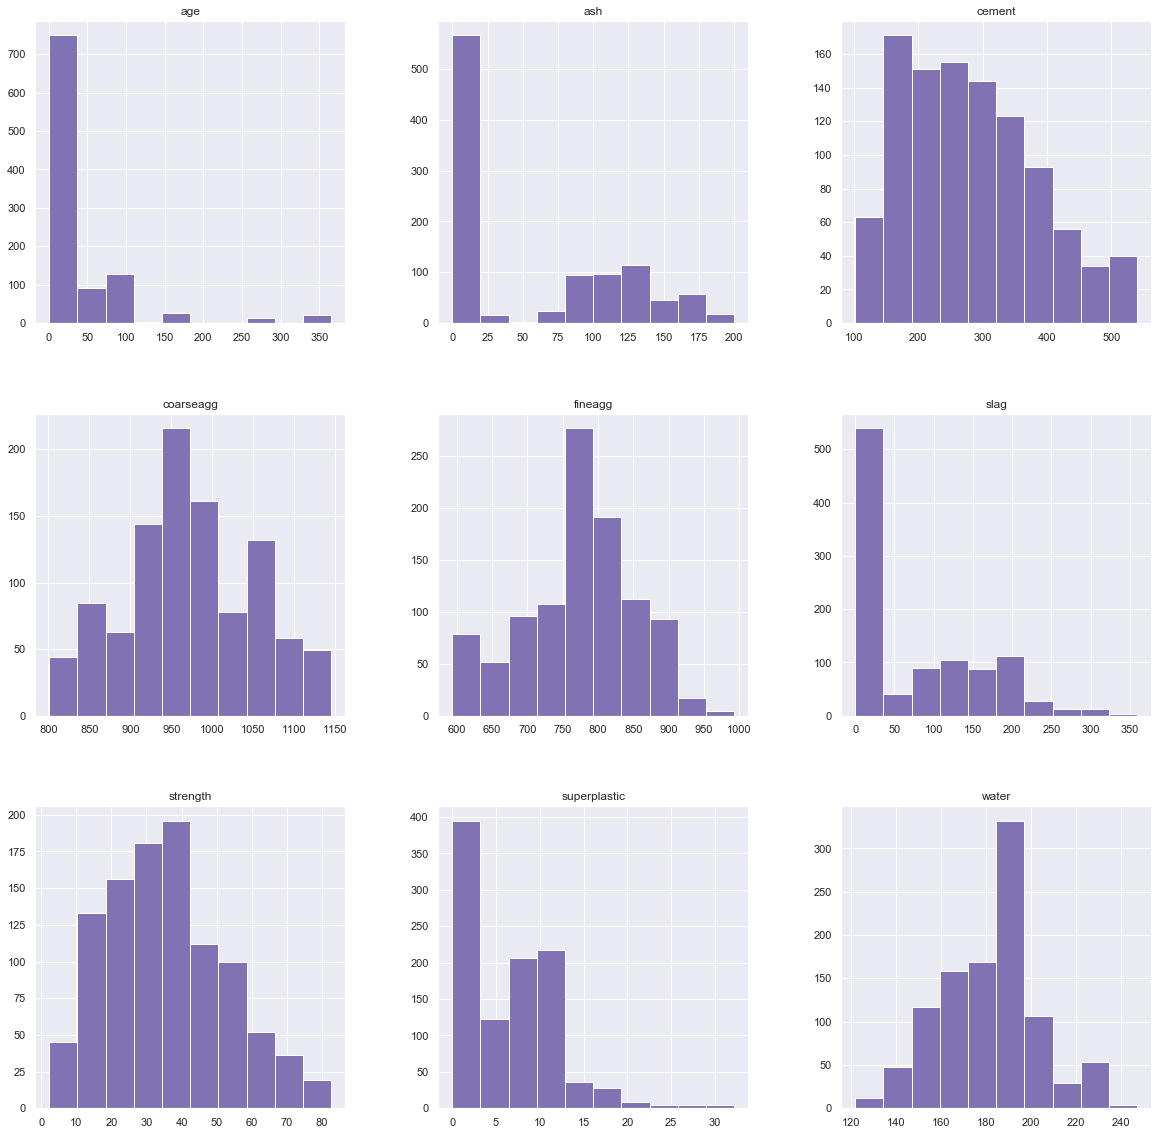

In [28]:
# plot histogram

db.hist(figsize=(20,20),color="m",grid=True)
plt.show()

### The details of the Input variables : 

Input variables are : (as follows)

1. Cement : measured in kg in a m3 mixture
2. Blast : measured in kg in a m3 mixture
3. Fly ash : measured in kg in a m3 mixture
4. Water : measured in kg in a m3 mixture
5. Superplasticizer : measured in kg in a m3 mixture
6. Coarse Aggregate : measured in kg in a m3 mixture
7. Fine Aggregate : measured in kg in a m3 mixture
8. Age : day (1~365)

And the Target variable is : 

Concrete compressive strength measured in MPa . (Continuous variable)

### Checking relation between various independent variables :  

<Figure size 1440x1440 with 0 Axes>

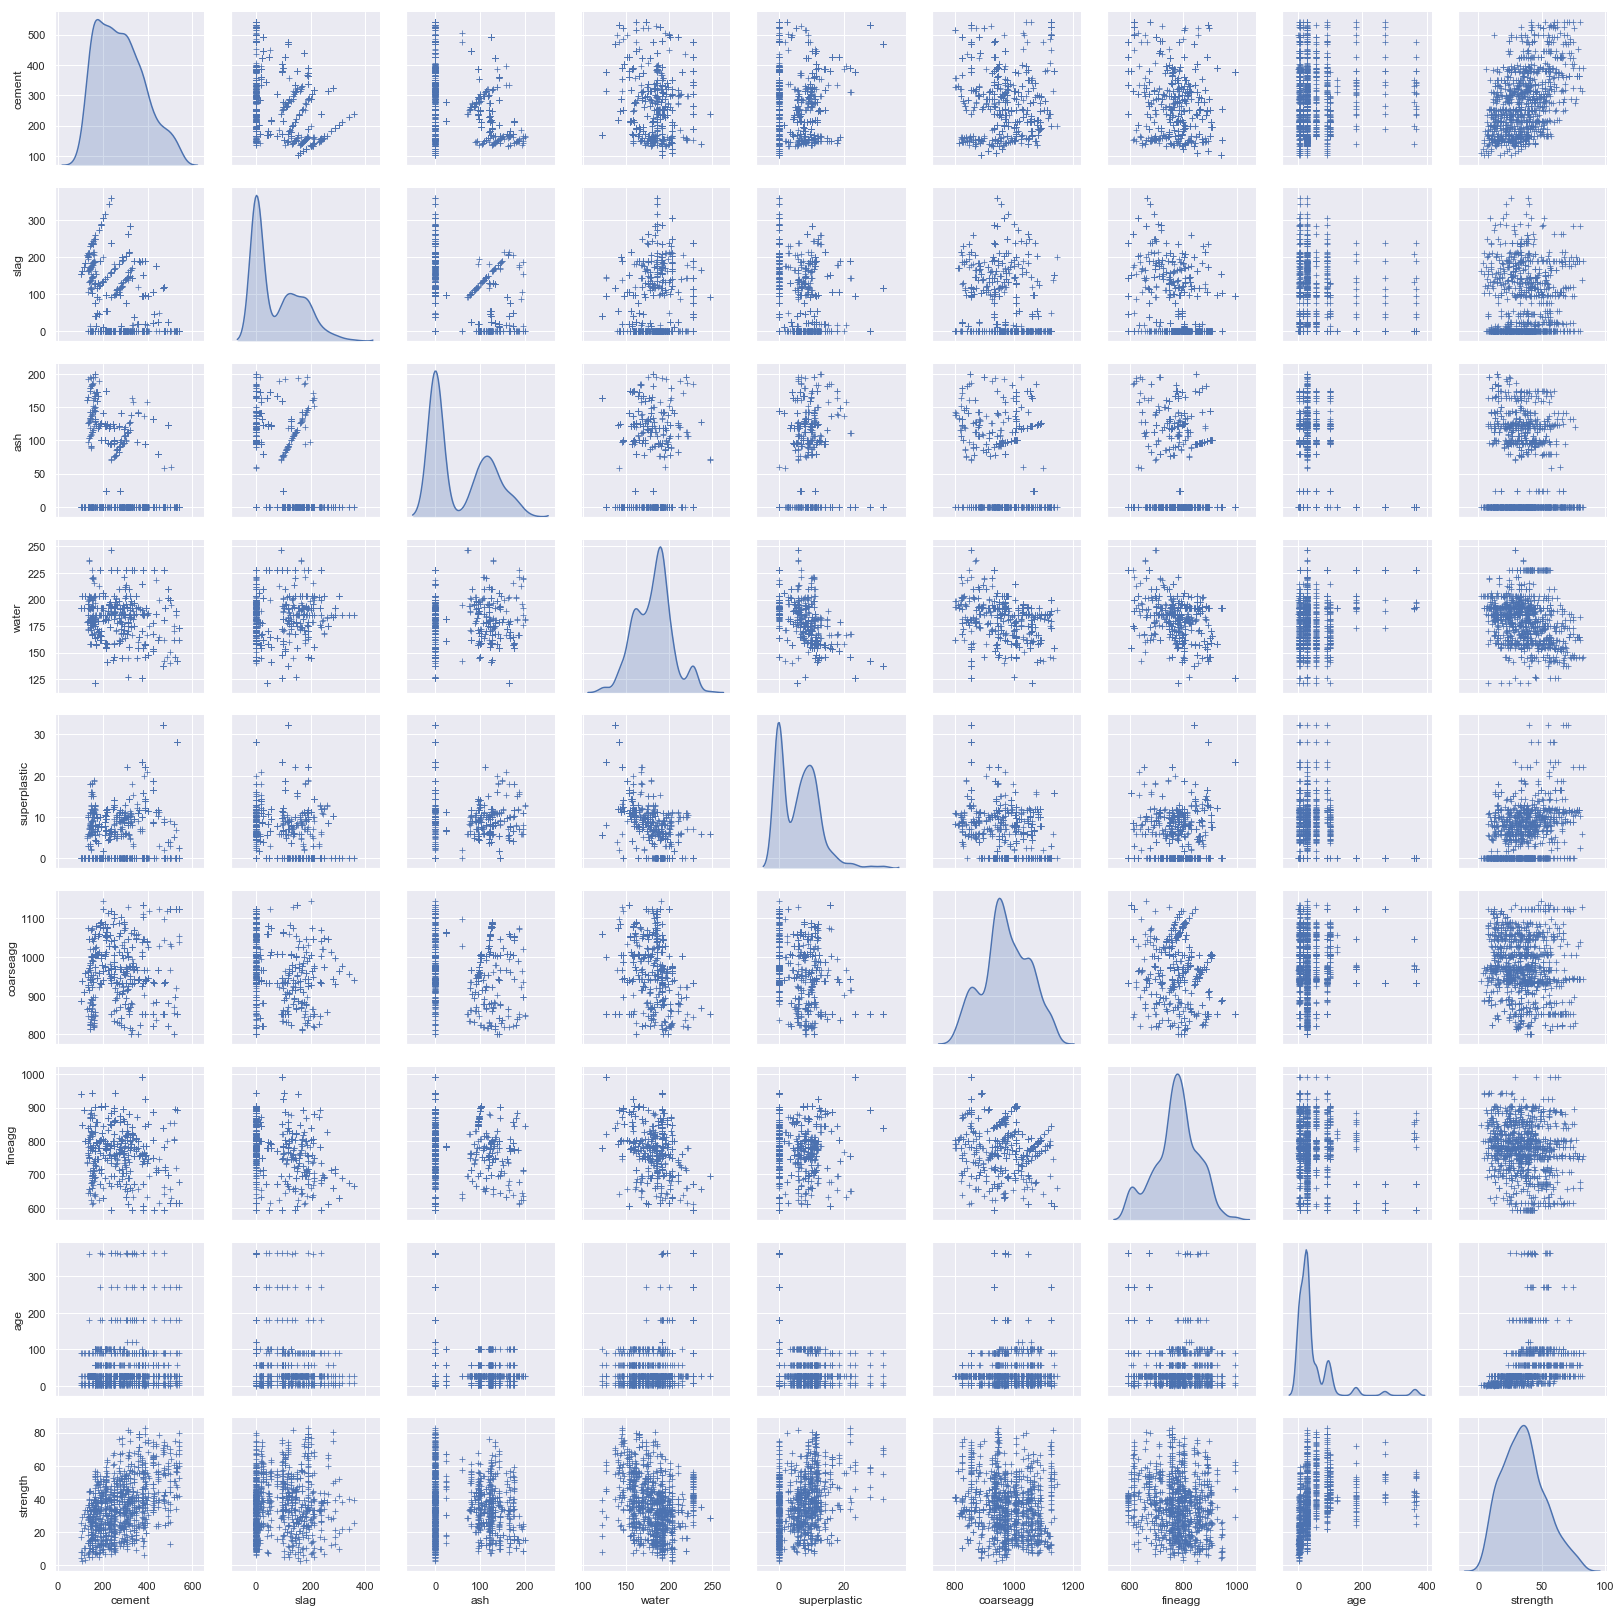

<Figure size 1440x1440 with 0 Axes>

In [29]:
# plotting pair plot for finding the corelation between the independent variables:
sns.pairplot(db,markers="+", diag_kind='kde')
plt.figure(figsize=(20,20))

In [30]:
#Checking the corelation coefficient of each variables :
cor=db.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x105b4c88>)

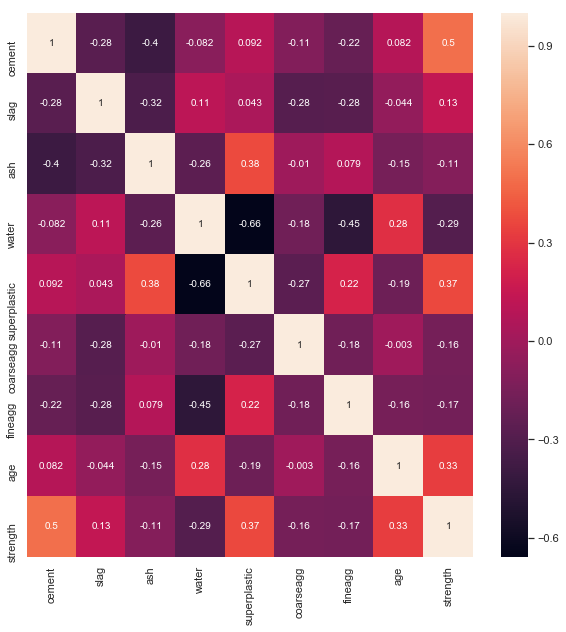

In [31]:
#Plotting the Heatmap with the variables
plt.subplots(figsize=(10,10))
sns.heatmap(cor,annot=True)

In [32]:
#Correlation plot | Checking which relations has the higher coefficients : 
cor.loc[:,:] = np.tril(cor,k=-1)
cor1=cor.stack()
cor1=cor1[(cor1 > 0.55) | (cor1< -0.55)]
cor1

superplastic  water   -0.657533
dtype: float64

### Splitting the dataset in Independent and Target variables :  

In [33]:
# Copy all the predictor variables into X dataframe. Since 'strength' is dependent variable drop it
X = db.drop('strength', axis=1)

# Copy the 'strength' column alone into the y dataframe. This is the dependent variable
y = db[['strength']]

In [34]:
# Finding the Covariance Matrix for the independent columns
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00097182 -0.27548337 -0.39785361 -0.08166604  0.09247596 -0.10945526
  -0.22293429  0.08202566]
 [-0.27548337  1.00097182 -0.32389436  0.10735626  0.04331247 -0.28427461
  -0.28187634 -0.04428902]
 [-0.39785361 -0.32389436  1.00097182 -0.25723376  0.37787001 -0.00997051
   0.07918537 -0.15452054]
 [-0.08166604  0.10735626 -0.25723376  1.00097182 -0.65817191 -0.18247076
  -0.45109913  0.27788802]
 [ 0.09247596  0.04331247  0.37787001 -0.65817191  1.00097182 -0.26625765
   0.22290765 -0.1928873 ]
 [-0.10945526 -0.28427461 -0.00997051 -0.18247076 -0.26625765  1.00097182
  -0.17865441 -0.00301881]
 [-0.22293429 -0.28187634  0.07918537 -0.45109913  0.22290765 -0.17865441
   1.00097182 -0.1562464 ]
 [ 0.08202566 -0.04428902 -0.15452054  0.27788802 -0.1928873  -0.00301881
  -0.1562464   1.00097182]]


In [35]:
# Finding eigen values and eigen vectors for the independent columns : 
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.09840137  0.44616267  0.22184381  0.11373709 -0.81420224 -0.20314214
  -0.14820612 -0.054297  ]
 [-0.17726197  0.43738376  0.22836331 -0.6860529   0.17179437  0.30488197
   0.02093167 -0.36269932]
 [ 0.39466185  0.38188581  0.35246257  0.14294751  0.40822055 -0.1832672
  -0.54963115  0.2267512 ]
 [-0.54700395  0.38874117 -0.52427468 -0.05325628  0.21318975 -0.36597033
  -0.07022191  0.29606003]
 [ 0.50594541  0.05174995 -0.66464314 -0.2829296  -0.23459653  0.19329372
  -0.35461841 -0.03727351]
 [-0.03792808  0.34931986 -0.22684015  0.62994342  0.17408781  0.31455942
   0.03308317 -0.54580513]
 [ 0.40192597  0.43336994 -0.03902583  0.01939111  0.00456921  0.09246568
   0.70123743  0.38528206]
 [-0.29147949  0.01288097  0.06936667  0.12598089 -0.10052137  0.743908
  -0.22801019  0.52791909]]

 Eigen Values 
%s [2.2823152  0.03007197 0.17801452 1.41745097 1.34138135 0.7909634
 0.95243269 1.01514445]


In [36]:
#Sorting eigenvalues in descending order and making a set of (eigenvalue, eigenvector) pairs :
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sorting the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue :
eig_pairs.sort()
eig_pairs.reverse()
print(eig_pairs)

# Extracting the descending ordered eigenvalues and eigenvectors accordingly :
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Taking print out of the eigenvalues :
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(2.2823152013536308, array([-0.09840137, -0.17726197,  0.39466185, -0.54700395,  0.50594541,
       -0.03792808,  0.40192597, -0.29147949])), (1.4174509661276897, array([ 0.11373709, -0.6860529 ,  0.14294751, -0.05325628, -0.2829296 ,
        0.62994342,  0.01939111,  0.12598089])), (1.3413813455154502, array([-0.81420224,  0.17179437,  0.40822055,  0.21318975, -0.23459653,
        0.17408781,  0.00456921, -0.10052137])), (1.0151444464276258, array([-0.054297  , -0.36269932,  0.2267512 ,  0.29606003, -0.03727351,
       -0.54580513,  0.38528206,  0.52791909])), (0.952432685352252, array([-0.14820612,  0.02093167, -0.54963115, -0.07022191, -0.35461841,
        0.03308317,  0.70123743, -0.22801019])), (0.7909633985237704, array([-0.20314214,  0.30488197, -0.1832672 , -0.36597033,  0.19329372,
        0.31455942,  0.09246568,  0.743908  ])), (0.1780145200981702, array([ 0.22184381,  0.22836331,  0.35246257, -0.52427468, -0.66464314,
       -0.22684015, -0.03902583,  0.06936667])), (0.030

In [37]:
# Making an array of Variance and Eigen Vector : ( 18 elements for 8 eigen vectors)
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # Array of variance explained by each 
cum_var_exp = np.cumsum(var_explained)  # Array of cumulative variance which reaching almost 100%

<BarContainer object of 8 artists>

Text(0, 0.5, 'Explained variance ratio')

Text(0.5, 0, 'Principal components')

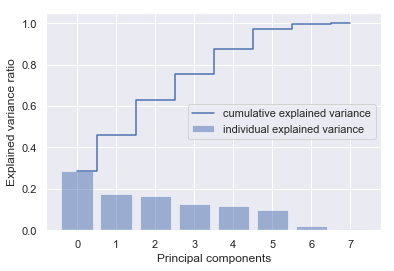

In [38]:
# Ploting the cumulative Variance :
plt.bar(range(0,8), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0,8),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [39]:
P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 5 dimension space
X_std_5D = np.dot(X_std,P_reduce.T)           # projecting original data into principal component dimensions
Proj_data_df = pd.DataFrame(X_std_5D)

We have ponited out that which independent variables affect the target variales ('strength') the most. And according to that we have dropped the least affected columns.

# Linear Regression

Since the Target variable is of continuous type, we are checking the Linear Regression model. We will be doing this with 3 datsets,
1. The original Dataset
2. The Scaled Datset (without the independent variables being dropped)
3. The scalled reduced (dropped) Dataset

In [40]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [41]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.12655755592921442
The coefficient for slag is 0.10882841423627004
The coefficient for ash is 0.09070514083244785
The coefficient for water is -0.10315724008089916
The coefficient for superplastic is 0.37612343073244014
The coefficient for coarseagg is 0.024028594961397025
The coefficient for fineagg is 0.03619289456011234
The coefficient for age is 0.11043496734221778


In [43]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -52.9632711589133


In [44]:
regression_model.score(X_train, y_train)

0.6031487540630229

The score is not at all good for training itself.

In [45]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

rg_accuracy= regression_model.score(X_test, y_test)
rg_accuracy

0.6339136715208273

Hence the training result is also very bad.

### Implementing the Lasso and Ridge for increasing the accuracy score :  

In [46]:
# Create a regularized RIDGE model and note the coefficients
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge model: [[ 0.12655756  0.10882838  0.09070532 -0.10315964  0.37611194  0.0240282
   0.0361927   0.11043496]]


In [47]:
# Create a regularized LASSO model and note the coefficients

lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso model: [ 0.12642426  0.10864017  0.09060084 -0.10474093  0.36977576  0.02367758
  0.03593856  0.11038264]


In [48]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.6031487540568201
0.6339139078395876


In [49]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.6031466127243784
0.6340482564852603


In [50]:
# More or less similar results but with less complex models.  Complexity is a function of variables and coefficients
## Note - with Lasso, we get equally good result in test though not so in training.  Further, the number of dimensions is much less
# in LASSO model than ridge or un-regularized model

In [51]:
# Let us generate polynomial models reflecting the non-linear interaction between some dimensions

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True)   #poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
Xr_train.shape

(721, 37)

In [52]:
# Fit a simple non regularized linear model on poly features

regression_model.fit(Xr_train, yr_train)
print(regression_model.coef_[0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

[ 9.20823024e-12  3.31758212e-01 -9.08573832e-02 -5.71530044e-02
  1.29592788e+00 -6.66682676e+00 -1.05885295e-01 -2.83594401e-01
 -1.68454436e-01  8.43245855e-05  1.73135016e-04 -1.74982414e-03
 -2.78671374e-03  4.05515782e-05  7.37529075e-05  4.41307512e-04
  3.19614147e-04 -8.86673520e-04  1.01310668e-03  5.49335457e-05
  3.01163689e-04  7.83103459e-04 -1.69742411e-03 -6.10034100e-03
  5.20370148e-05  3.85987189e-04  1.67296121e-03  1.54306840e-02
 -6.60667137e-04 -1.81212624e-04 -7.13575473e-04  3.82705273e-03
  2.07020009e-03  6.38336931e-03  2.61807049e-04 -6.14516011e-05
  3.65575256e-04]


In [53]:
ridge = Ridge(alpha=.3)
ridge.fit(Xr_train,yr_train)
print ("Ridge model:", (ridge.coef_))

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge model: [[ 0.00000000e+00  3.34737287e-01 -8.90485076e-02 -6.30434183e-02
   1.32035147e+00 -5.86750605e+00 -1.02711861e-01 -2.79869108e-01
  -1.60696328e-01  8.73200298e-05  1.77720733e-04 -1.76103896e-03
  -3.06993810e-03  4.03666779e-05  7.44596754e-05  4.39670032e-04
   3.25685432e-04 -8.96567438e-04  6.94464692e-04  5.50193577e-05
   3.02286525e-04  7.80669809e-04 -1.70452413e-03 -6.47920159e-03
   5.66003664e-05  3.90510372e-04  1.67035513e-03  1.45558038e-02
  -6.68676049e-04 -1.90665156e-04 -7.25230464e-04  3.55321606e-03
   1.74081215e-03  6.37347701e-03  2.61315740e-04 -6.42094713e-05
   3.62849389e-04]]


In [54]:
print(ridge.score(Xr_train, yr_train))
print(ridge.score(Xr_test, yr_test))

0.7549507401174537
0.7448269022056297


In [55]:
lasso = Lasso(alpha=0.01)
lasso.fit(Xr_train,yr_train)
print ("Lasso model:", (lasso.coef_))

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso model: [ 0.00000000e+00  2.21404205e-01 -4.85591696e-02 -3.60039269e-01
  1.22344182e+00  3.08605943e+00 -6.08198717e-02 -1.87623469e-01
 -2.33899604e-01  1.05149554e-04  2.62455935e-04 -1.39623710e-03
 -5.41751229e-03  7.44081158e-05  1.02366687e-04  3.76408367e-04
  3.91284715e-04 -7.97537750e-04 -2.38926744e-03  3.69692562e-05
  2.57505275e-04  7.35721908e-04 -1.12596131e-03 -9.53355149e-03
  2.02600266e-04  4.44854099e-04  1.56911284e-03  4.97540193e-03
 -6.43272476e-04 -2.59970137e-04 -4.44508164e-04  2.63288743e-04
 -2.27426346e-03  7.92849595e-03  1.91816751e-04  6.57750511e-06
  3.23463468e-04]


In [56]:
print(lasso.score(Xr_train, yr_train))
print(lasso.score(Xr_test, yr_test))

0.7525017285340032
0.7479993592202738


The accuracy score is better than the Linear Regression model, but still comparatively poor.

In [57]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
185,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14,22.53
286,374.0,189.2,0.0,170.1,10.1,926.1,756.7,91,64.90
600,277.0,0.0,0.0,191.0,0.0,968.0,856.0,3,11.36
691,380.0,95.0,0.0,228.0,0.0,932.0,594.0,7,32.82
474,356.0,0.0,142.0,193.0,11.0,801.0,778.0,28,40.87


In [58]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'strength ~ cement+slag+ash+water+superplastic+coarseagg+fineagg+age', data = data_train).fit()
lm1.params

Intercept      -52.963271
cement           0.126558
slag             0.108828
ash              0.090705
water           -0.103157
superplastic     0.376123
coarseagg        0.024029
fineagg          0.036193
age              0.110435
dtype: float64

In [59]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     135.3
Date:                Sun, 18 Aug 2019   Prob (F-statistic):          2.18e-137
Time:                        18:55:19   Log-Likelihood:                -2712.8
No. Observations:                 721   AIC:                             5444.
Df Residuals:                     712   BIC:                             5485.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -52.9633     31.085     -1.704   

### With Scaled data

In [60]:
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores 
# or someother methode to address the problem of different scales 

from scipy.stats import zscore

db_scaled  = db.apply(zscore)

In [61]:
#convert the numpy array back into a dataframe 

db_scaled = pd.DataFrame(db_scaled, columns=db.columns)

#browse the contents of the dataframe. Check that all the values are now z scores

db_scaled

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,-0.355018
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465,-0.737108
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733,-0.395144
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,0.600806
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733,-1.049727
5,-0.250517,-0.856888,-0.847144,0.488793,-1.039143,-1.069519,2.139079,0.702224,-0.835925
6,-1.094894,2.044404,-0.847144,1.027590,-1.039143,0.034498,-1.010525,-0.612331,-1.201845
7,-0.284981,-0.856888,1.002278,0.324811,0.032715,0.713893,-0.198167,0.163731,0.049231
8,0.141995,-0.856888,-0.847144,0.488793,-1.039143,1.442184,-0.107073,-0.279733,-0.848501
9,-1.207861,1.276756,1.388421,0.582497,0.468157,-1.195619,-0.930662,-0.279733,-0.408918


In [62]:
# Copy all the predictor variables into X dataframe. Since 'strength' is dependent variable drop it
X1 = db_scaled.drop('strength', axis=1)

# Copy the 'strength' column alone into the y dataframe. This is the dependent variable
y1 = db_scaled[['strength']]


In [63]:
# Split X and y into training and test set in 75:25 ratio

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=2)

In [64]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.7226143820688012
The coefficient for slag is 0.5189704997715079
The coefficient for ash is 0.3273923599807821
The coefficient for water is -0.17899622657914566
The coefficient for superplastic is 0.09998256530705507
The coefficient for coarseagg is 0.08638634755659592
The coefficient for fineagg is 0.08394142496135504
The coefficient for age is 0.4056294392441522


In [66]:
intercept1 = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept1))

The intercept for our model is -0.010312791757049482


In [67]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X1_test, y1_test)

0.6824824416609347

In [68]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases
import math

mse1 = np.mean((regression_model.predict(X1_test)-y1_test)**2)

# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

math.sqrt(mse1)

0.5884954203048388

The accuracy score is still very bad.

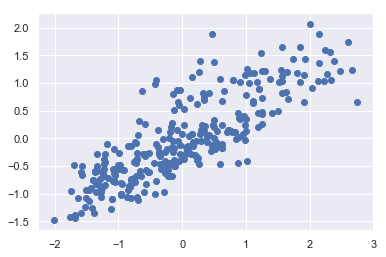

In [69]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y1_pred = regression_model.predict(X1_test)

# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y1_test['strength'], y1_pred)

In [70]:
# Create a regularized RIDGE model and note the coefficients

ridge1 = Ridge(alpha=.3)
ridge1.fit(X1_train,y1_train)
print ("Ridge model:", (ridge.coef_))

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge model: [[ 0.00000000e+00  3.34737287e-01 -8.90485076e-02 -6.30434183e-02
   1.32035147e+00 -5.86750605e+00 -1.02711861e-01 -2.79869108e-01
  -1.60696328e-01  8.73200298e-05  1.77720733e-04 -1.76103896e-03
  -3.06993810e-03  4.03666779e-05  7.44596754e-05  4.39670032e-04
   3.25685432e-04 -8.96567438e-04  6.94464692e-04  5.50193577e-05
   3.02286525e-04  7.80669809e-04 -1.70452413e-03 -6.47920159e-03
   5.66003664e-05  3.90510372e-04  1.67035513e-03  1.45558038e-02
  -6.68676049e-04 -1.90665156e-04 -7.25230464e-04  3.55321606e-03
   1.74081215e-03  6.37347701e-03  2.61315740e-04 -6.42094713e-05
   3.62849389e-04]]


In [71]:
# Create a regularized LASSO model and note the coefficients

lasso1 = Lasso(alpha=0.1)
lasso1.fit(X1_train,y1_train)
print ("Lasso model:", (lasso.coef_))

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso model: [ 0.00000000e+00  2.21404205e-01 -4.85591696e-02 -3.60039269e-01
  1.22344182e+00  3.08605943e+00 -6.08198717e-02 -1.87623469e-01
 -2.33899604e-01  1.05149554e-04  2.62455935e-04 -1.39623710e-03
 -5.41751229e-03  7.44081158e-05  1.02366687e-04  3.76408367e-04
  3.91284715e-04 -7.97537750e-04 -2.38926744e-03  3.69692562e-05
  2.57505275e-04  7.35721908e-04 -1.12596131e-03 -9.53355149e-03
  2.02600266e-04  4.44854099e-04  1.56911284e-03  4.97540193e-03
 -6.43272476e-04 -2.59970137e-04 -4.44508164e-04  2.63288743e-04
 -2.27426346e-03  7.92849595e-03  1.91816751e-04  6.57750511e-06
  3.23463468e-04]


In [72]:
print(ridge1.score(X1_train, y1_train))
print(ridge1.score(X1_test, y1_test))

0.5806739224079858
0.6823557052837683


In [73]:
print(lasso1.score(X1_train, y1_train))
print(lasso1.score(X1_test, y1_test))

0.48755938382461617
0.5439229735276858


In [74]:
# Let us generate polynomial models reflecting the non-linear interaction between some dimensions

poly1 = PolynomialFeatures(degree = 2, interaction_only=True)   #poly1 = PolynomialFeatures(2)
X_poly1 = poly1.fit_transform(X1)
Xr1_train, Xr1_test, yr1_train, yr1_test = train_test_split(X_poly1, y1, test_size=0.30, random_state=1)
Xr1_train.shape

(721, 37)

In [75]:
# Fit a simple non regularized linear model on poly features

regression_model.fit(Xr1_train, yr1_train)
print(regression_model.coef_[0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

[ 3.00948261e-18  8.07163519e-01  6.07594652e-01  3.62814378e-01
 -9.37829211e-02  2.54605544e-01  7.40433500e-02  1.51974278e-01
  8.96966381e-01  4.54911676e-02  6.92804343e-02 -2.33638352e-01
 -1.04090739e-01  1.97149777e-02  3.69734068e-02  1.74308127e-01
  1.05588293e-01 -9.77411740e-02  3.12420122e-02  2.20490684e-02
  1.24645618e-01  2.55363922e-01 -1.38789624e-01 -1.39537440e-01
  1.54923681e-02  1.18495025e-01  4.04649577e-01  1.17773032e-01
 -6.56314769e-02 -1.85626389e-02 -5.75913385e-02  1.06356472e-01
  5.93244330e-02  1.44124308e-01  9.76498101e-02 -1.80588155e-02
  1.10778287e-01]


In [76]:
ridge1 = Ridge(alpha=.3)
ridge1.fit(Xr1_train,yr1_train)
print ("Ridge model:", (ridge.coef_))

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge model: [[ 0.00000000e+00  3.34737287e-01 -8.90485076e-02 -6.30434183e-02
   1.32035147e+00 -5.86750605e+00 -1.02711861e-01 -2.79869108e-01
  -1.60696328e-01  8.73200298e-05  1.77720733e-04 -1.76103896e-03
  -3.06993810e-03  4.03666779e-05  7.44596754e-05  4.39670032e-04
   3.25685432e-04 -8.96567438e-04  6.94464692e-04  5.50193577e-05
   3.02286525e-04  7.80669809e-04 -1.70452413e-03 -6.47920159e-03
   5.66003664e-05  3.90510372e-04  1.67035513e-03  1.45558038e-02
  -6.68676049e-04 -1.90665156e-04 -7.25230464e-04  3.55321606e-03
   1.74081215e-03  6.37347701e-03  2.61315740e-04 -6.42094713e-05
   3.62849389e-04]]


In [77]:
print(ridge1.score(Xr1_train, yr1_train))
ridge_score=ridge1.score(Xr1_test, yr1_test)
ridge_score

0.7549463250929687


0.7444379607063951

In [78]:
lasso1 = Lasso(alpha=0.01)
lasso1.fit(Xr1_train,yr1_train)
print ("Lasso model:", (lasso.coef_))

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso model: [ 0.00000000e+00  2.21404205e-01 -4.85591696e-02 -3.60039269e-01
  1.22344182e+00  3.08605943e+00 -6.08198717e-02 -1.87623469e-01
 -2.33899604e-01  1.05149554e-04  2.62455935e-04 -1.39623710e-03
 -5.41751229e-03  7.44081158e-05  1.02366687e-04  3.76408367e-04
  3.91284715e-04 -7.97537750e-04 -2.38926744e-03  3.69692562e-05
  2.57505275e-04  7.35721908e-04 -1.12596131e-03 -9.53355149e-03
  2.02600266e-04  4.44854099e-04  1.56911284e-03  4.97540193e-03
 -6.43272476e-04 -2.59970137e-04 -4.44508164e-04  2.63288743e-04
 -2.27426346e-03  7.92849595e-03  1.91816751e-04  6.57750511e-06
  3.23463468e-04]


In [79]:
print(lasso1.score(Xr1_train, yr1_train))
lasso_score=lasso1.score(Xr1_test, yr1_test)
lasso_score

0.7388362003903456


0.7251665451532648

Implementing Ridge and Lasso model on the scaled dataset gives a better result. The accuracy score is now more than 70 %. We are implemeting other models to increase the accuracy score.

### Dropping the least affecting columns : 

We have already done the investigation on the impact of the independent variables to the target variables. We even have dropped the least affecting columns. Lets do Linear regression on this model : 

In [80]:
# Applying the zscore on the modified dataset :
Proj_data_df_scaled  = Proj_data_df.apply(zscore)
Proj_data_df_scaled = pd.DataFrame(Proj_data_df, columns=Proj_data_df.columns)
Proj_data_df_scaled
# Checking the contains of the scaled cropped dataset

,0,1,2,3,4
0,-1.618002,-1.183167,1.506561,-0.617667,0.837767
1,1.796140,0.943648,1.139801,-0.824862,-0.289017
2,0.756994,0.521654,0.443834,0.945533,0.515931
3,-2.536216,-0.670491,0.490418,-0.028372,-0.147410
4,-0.836137,-0.746435,1.051335,-1.482675,-0.116318
5,-0.255279,0.162463,-0.188079,2.094364,2.123489
6,-1.905819,-1.483923,1.422653,-1.262612,0.399161
7,0.259927,1.138673,0.662462,0.268918,-0.713670
8,-1.005733,1.622073,0.018039,-0.681645,0.797222
9,0.111553,-1.784766,1.599643,0.218666,-1.392691


In [81]:

# Copy the 'strength' column alone into the y dataframe. This is the dependent variable
y2 = db_scaled[['strength']]


In [82]:
# Train and test split for regression model : 
X2_train, X2_test, y2_train, y2_test = train_test_split(Proj_data_df_scaled, y2, test_size=0.30, random_state=2)
regression_model.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X2_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for 0 is 0.019782897084231362
The coefficient for 1 is -0.1217918196642761
The coefficient for 2 is -0.4444294765576269
The coefficient for 3 is -0.008670745125556245
The coefficient for 4 is -0.3268173601730941


In [84]:
intercept2 = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept2))

The intercept for our model is -0.0031059369044208755


In [85]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X2_test, y2_test)

0.4831913453075404

## Decision Tree Regression Implementation : 

In [86]:
# Implementing the Decision Tree Regression model on this dataset : 
array = db_scaled.values
X3 = array[:,0:7] # select all rows and first 8 columns which are the attributes
y3 = array[:,8]   # select all rows and the 9th column 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, random_state=2)

In [87]:
# Import Linear Regression machine learning library
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0, max_depth=3)

regressor.fit(X3_train , y3_train)
feature_importances = regressor.feature_importances_


feature_names = db_scaled.columns[:8]
print(feature_names)

k = 8

print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(feature_names[top_k_idx], feature_importances)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.60097538 0.13460692 0.04660388 0.17633112 0.         0.
 0.04148269]
Index(['cement', 'water', 'slag', 'ash', 'fineagg', 'coarseagg',
       'superplastic'],
      dtype='object') [0.60097538 0.13460692 0.04660388 0.17633112 0.         0.
 0.04148269]


In [88]:
y3_pred = regressor.predict(X3_test)

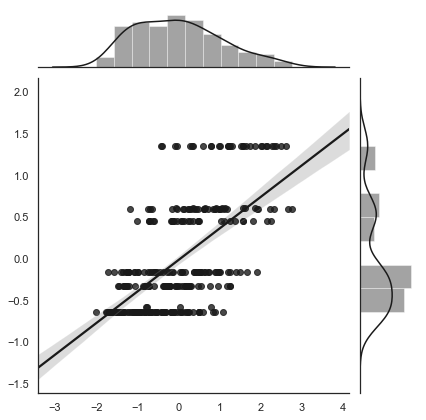

In [89]:
sns.set(style="darkgrid", color_codes=True)

            
#g = sns.jointplot("y_actuals", "y_predicted", data=tips, kind="reg",
#                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)
            
with sns.axes_style("white"):
    sns.jointplot(x=y3_test, y=y3_pred, kind="reg", color="k");

### Dropping the unwanted columns : 

In [90]:
# Checking the dataset
db_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null float64
strength        1030 non-null float64
dtypes: float64(9)
memory usage: 72.5 KB


In [91]:
#Drop ash, slag and othet columns based on the above visual analysis

X4 = db_scaled.drop( ['ash','slag','strength','coarseagg','fineagg'] , axis=1)
y4 = db_scaled['strength']


X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.30, random_state=2)

In [92]:
regressor.fit(X4_train , y4_train)
y4_pred = regressor.predict(X4_test)

regressor.feature_importances_

print (pd.DataFrame(regressor.feature_importances_, columns = ["Imp"], index = X4_train.columns))

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

array([0.49569768, 0.07116063, 0.        , 0.43314169])

                   Imp
cement        0.495698
water         0.071161
superplastic  0.000000
age           0.433142


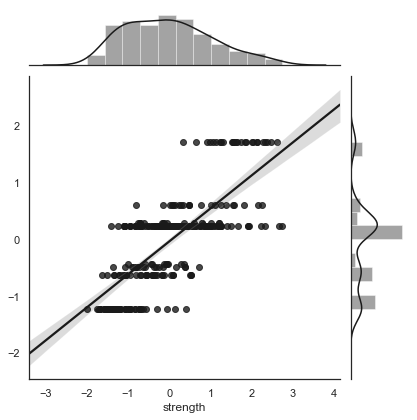

In [93]:
y4_pred = regressor.predict(X4_test)

with sns.axes_style("white"):
    sns.jointplot(x=y4_test, y=y4_pred, kind="reg", color="k");

## K-fold cross-validation 

k-fold cross validation(without stratification)
Usually k is set as 10-20 in practical settings, depends on data set size

In [94]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 77

In [95]:
rg_accuracy1 = rg_accuracy * 100

In [96]:
kfold = KFold(n_splits=num_folds, random_state=seed)

# rgm = fit on training
regression_model = LinearRegression()
rgm = regression_model.fit(X1_train, y1_train)

results = cross_val_score(rgm,X, y, cv=kfold)

Kfold_CV=np.around(np.mean(abs(results*100)))

scores=list()

for i in range(num_folds):
    print("Kfold",i,":",results[i]*100,"%\n")
    value=results[i]*100
    scores.append(value)

print("Mean:",Kfold_CV,"%")

print("\nStandard Deviation:",results.std())

print("\n\nLinear Regression Accuracy",rg_accuracy1,"%\n\n")

improvement=Kfold_CV-rg_accuracy1
print("Accuracy improvement:",np.around(improvement),"%")

Kfold 0 : 47.614371293733015 %

Kfold 1 : 67.56790465048606 %

Kfold 2 : 69.8408993237468 %

Kfold 3 : 57.07206296696177 %

Kfold 4 : 54.73870862967692 %

Kfold 5 : 68.53996380815606 %

Kfold 6 : 59.86360198638949 %

Kfold 7 : 61.65160321395518 %

Kfold 8 : 50.39696447459286 %

Kfold 9 : 54.624388722899695 %

Mean: 59.0 %

Standard Deviation: 0.07307688397703951


Linear Regression Accuracy 63.391367152082736 %


Accuracy improvement: -4.0 %


We have use k = 10 and found out the values of accuracy for each case. We also have contained the accuracy score within a list.

In [97]:
# checking the contains of the list :
scores

[47.614371293733015,
 67.56790465048606,
 69.8408993237468,
 57.07206296696177,
 54.73870862967692,
 68.53996380815606,
 59.86360198638949,
 61.65160321395518,
 50.39696447459286,
 54.624388722899695]

In [98]:
# Finding the confidence level at 95 % accuracy : 
print('50th percentile (median) = %.3f' % np.median(scores))
# calculate 95% confidence intervals (100 - alpha)
alpha = 5.0
# calculate lower percentile (e.g. 2.5)
lower_p = alpha / 2.0
# retrieve observation at lower percentile
lower = max(0.0, np.percentile(scores, lower_p))
print('%.1fth percentile = %.3f' % (lower_p, lower))
# calculate upper percentile (e.g. 97.5)
upper_p = (100 - alpha) + (alpha / 2.0)
# retrieve observation at upper percentile
upper = min(1.0, np.percentile(scores, upper_p))
print('%.1fth percentile = %.3f' % (upper_p, upper))

50th percentile (median) = 58.468
2.5th percentile = 48.240
97.5th percentile = 1.000


There is a 95% likelihood that the range 48.240  to 58.468 covers the true statistic mean.

## Using Random Forest Regressor : 

In [99]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X1_train, y1_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [100]:
y5_pred = regressor.predict(X1_test)  # test the output by changing values 

In [101]:
reg1=regressor.score(X1_test, y1_test)
reg1

0.8883547431068165

The accuracy level for Random Forest Regression is quite high.

## Model Tuning using hyper parameters

In [102]:
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 1)

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


## RandomSearchCV

Here we are using the scaled dataset

In [103]:
import numpy as np
print(np.linspace(start = 5, stop = 10, num = 2))

[ 5. 10.]


In [104]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 15]}


In [105]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X1_train, y1_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.2s finished


In [106]:
rf_random.best_params_

{'n_estimators': 15,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [107]:
best_random = rf_random.best_estimator_
Rand_search_cv = np.around(best_random.score(X1_test , y1_test)*100)

print("Random sarch CV Score:",Rand_search_cv,"%")

print("\n\nRegression Accuracy",reg1*100,"%\n\n")

improvement=Rand_search_cv-reg1*100

print("Accuracy improvement:",np.around(improvement),"%")

Random sarch CV Score: 87.0 %


Regression Accuracy 88.83547431068165 %


Accuracy improvement: -2.0 %


## GridSearcCV

In [108]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6,7,8,9],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
}    

rf = RandomForestRegressor(random_state = 1)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

grid_search.fit(X1_train, y1_train);

grid_search.best_params_

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'bootstrap': [True], 'max_depth': [5, 6, 7, 8, 9], 'max_features': [2, 3, 4, 5], 'min_samples_leaf': [3, 4], 'min_samples_split': [5, 10], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

{'bootstrap': True,
 'max_depth': 9,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 20}

In [109]:
best_grid = grid_search.best_estimator_

Grid_search_cv=np.around(best_grid.score(X1_test, y1_test)*100)
print("Grid sarch CV Score:",Grid_search_cv,"%")

print("\n\n Regression Accuracy",reg1*100,"%\n\n")

improvement=Grid_search_cv-reg1*100
print("Accuracy improvement:",np.around(improvement),"%")

Grid sarch CV Score: 88.0 %


 Regression Accuracy 88.83547431068165 %


Accuracy improvement: -1.0 %


In [110]:
print("Regression Accuracy:", rg_accuracy1,"%")

print("\nRidge Score:", ridge_score*100,"%")

print("\nLasso Score:", lasso_score*100,"%")

print("\nK Fold:", Kfold_CV,"%")

print("\nRandom Forest Regression:",reg1*100,"%")

print("\nRandom search CV:",Rand_search_cv,"%")

print("\nGrid search CV Score:",Grid_search_cv,"%")

Regression Accuracy: 63.391367152082736 %

Ridge Score: 74.44379607063951 %

Lasso Score: 72.51665451532648 %

K Fold: 59.0 %

Random Forest Regression: 88.83547431068165 %

Random search CV: 87.0 %

Grid search CV Score: 88.0 %


In [111]:
Models=["Regression Accuracy","Ridge Score","Lasso Score:","K Fold","Random Forest Regression","Random sarch CV","Grid Search CV Score"]
Best=[rg_accuracy1,ridge_score*100,lasso_score*100,Kfold_CV,reg1*100,Rand_search_cv,Grid_search_cv]
Best=np.array(Best)

In [112]:
best=Best.argmax()
print("Best model is:",Models[best])

Best model is: Random Forest Regression


Hence the conclusion is 'Random Forest Regressor' is the best possible model and having the maximum accuracy.